#BitCoin - Historical Profile




***
## Legal Disclaimer

The Content on this project is for informational/study purposes only, you should not construe any such information or other material as legal, tax, investment, financial, or other advice. Nothing contained on our project constitutes a solicitation, recommendation, endorsement, or offer by HII or any third party service provider to buy or sell any securities or other financial instruments in this or in in any other jurisdiction in which such solicitation or offer would be unlawful under the securities laws of such jurisdiction.



 
## Aproach
The **moving average (MA)** is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses.

* The dataset was take from  https://www.investing.com/crypto/bitcoin/historical-data acessed 15/05/2020.

***
***


**Objective**

* On this project we'll work with the historical BitCoin dataset Jul 10, 2010 - Apr 15, 2020 and apply a simple Cross Moving Average Algorithmic Trading Strategy, applying the moving average (MA) 30 and 100 days.

* We'll create the function to based on the close Price to calculate the SMA30 (30 days) and SMA100 (100 days) and give the signal to Buy and Sell based on the MA strategy.









In [0]:
# Import libraries

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Bitcoin Historical Data - Investingcom.csv to Bitcoin Historical Data - Investingcom.csv


In [4]:
# Sorting in increasing chronology by the Index
df = pd.read_csv("Bitcoin Historical Data - Investingcom.csv")
df1 = df.sort_index(ascending=False)
df2 = df1.reset_index()
df2

,index,Date,Price,Open,High,Low,Vol.,Change %
0,3559,"Jul 18, 2010",0.1,0.0,0.1,0.1,0.08K,0.00%
1,3558,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%
2,3557,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
3,3556,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4,3555,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...,...,...
3555,4,"Apr 11, 2020","6,867.8","6,862.7","6,931.4","6,765.1",845.58K,0.07%
3556,3,"Apr 12, 2020","6,917.6","6,867.9","7,158.8","6,785.1",1.10M,0.73%
3557,2,"Apr 13, 2020","6,841.3","6,918.1","6,920.3","6,618.5",1.25M,-1.10%
3558,1,"Apr 14, 2020","6,850.9","6,841.8","6,970.8","6,768.6",999.53K,0.14%


In [6]:
df2['Price'].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
3555    <class 'str'>
3556    <class 'str'>
3557    <class 'str'>
3558    <class 'str'>
3559    <class 'str'>
Name: Price, Length: 3560, dtype: object

In [0]:
# Function that will remove the comma from the price values 
# https://pbpython.com/currency-cleanup.html
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace(',', ''))
    return(x)

In [8]:
df2['Price'] = df2['Price'].apply(clean_currency).astype(float)
df2


,index,Date,Price,Open,High,Low,Vol.,Change %
0,3559,"Jul 18, 2010",0.1,0.0,0.1,0.1,0.08K,0.00%
1,3558,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%
2,3557,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
3,3556,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4,3555,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...,...,...
3555,4,"Apr 11, 2020",6867.8,"6,862.7","6,931.4","6,765.1",845.58K,0.07%
3556,3,"Apr 12, 2020",6917.6,"6,867.9","7,158.8","6,785.1",1.10M,0.73%
3557,2,"Apr 13, 2020",6841.3,"6,918.1","6,920.3","6,618.5",1.25M,-1.10%
3558,1,"Apr 14, 2020",6850.9,"6,841.8","6,970.8","6,768.6",999.53K,0.14%


In [9]:
df2.describe()

,index,Price
count,3560.000000,3560.000000
mean,1779.500000,2340.473989
std,1027.827807,3549.996177
min,0.000000,0.100000
25%,889.750000,15.675000
50%,1779.500000,432.400000
75%,2669.250000,3866.050000
max,3559.000000,19345.500000


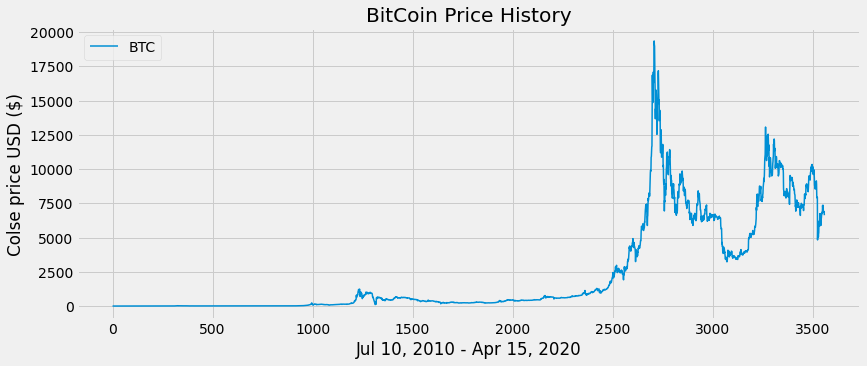

In [10]:
#Vizualise de data
plt.figure(figsize=(12.5,5))
plt.plot(df2['Price'], label='BTC', linewidth=1.5, )
plt.title("BitCoin Price History")
plt.xlabel('Jul 10, 2010 - Apr 15, 2020')
plt.ylabel('Colse price USD ($)')


plt.legend(loc='upper left')
plt.show()

## Creating the Moving Avareges (MA)

In [11]:

#Creating the Moving avarege with 30 days window
SMA30 = pd.DataFrame()
SMA30['Price'] = df2['Price'].rolling(window=30).mean()
SMA30

,Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3555,6359.783333
3556,6404.226667
3557,6459.513333
3558,6509.000000


In [12]:
#Creating the Moving avarege with 100 days window
SMA100 = pd.DataFrame()
SMA100['Price'] = df2['Price'].rolling(window=100).mean()
SMA100


,Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3555,8144.962
3556,8140.707
3557,8135.352
3558,8130.136


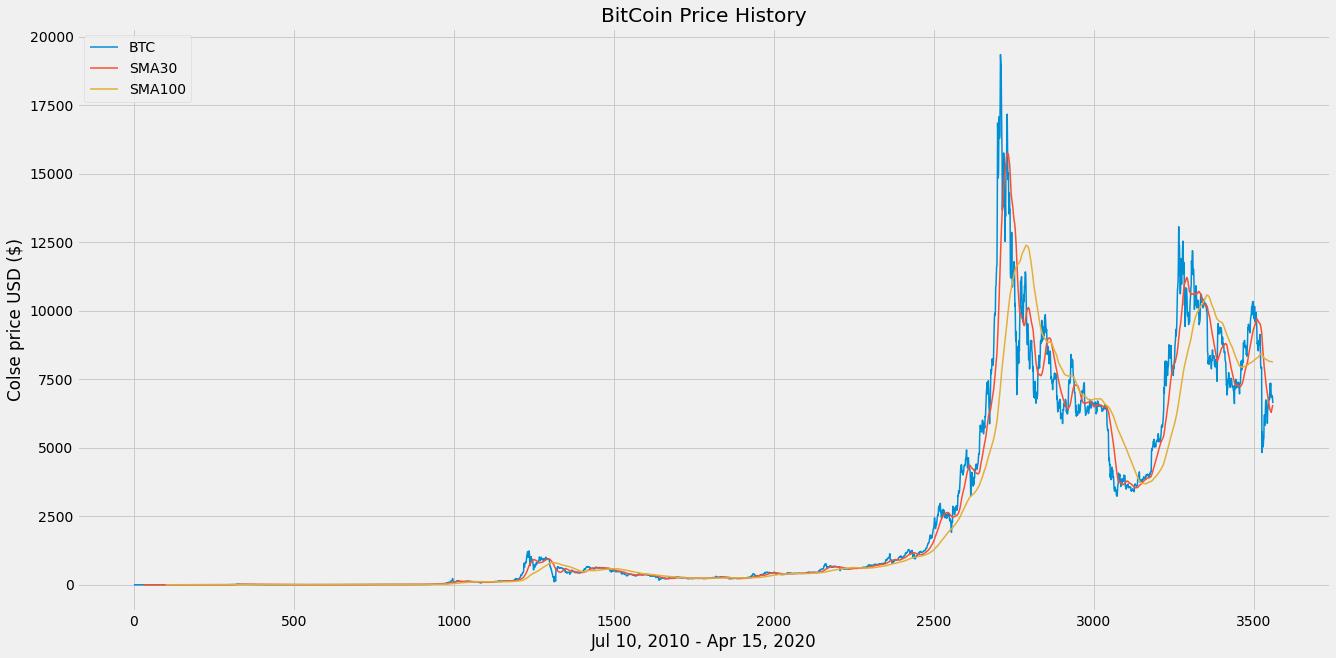

In [13]:
#Vizualise de data
plt.figure(figsize=(20,10))
plt.plot(df2['Price'], label='BTC', linewidth=1.5)
plt.plot(SMA30['Price'], label="SMA30", linewidth=1.5)
plt.plot(SMA100['Price'], label='SMA100', linewidth=1.5)
plt.title("BitCoin Price History")
plt.xlabel('Jul 10, 2010 - Apr 15, 2020')
plt.ylabel('Colse price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [14]:
#Creating a nwe dataframe to store all the data
stock_name = 'BTC'
data = pd.DataFrame()
data[stock_name] = df2['Price']
data['SMA30'] = SMA30['Price']
data['SMA100'] = SMA100['Price']
data

,BTC,SMA30,SMA100
0,0.1,NaN,NaN
1,0.1,NaN,NaN
2,0.1,NaN,NaN
3,0.1,NaN,NaN
4,0.1,NaN,NaN
...,...,...,...
3555,6867.8,6359.783333,8144.962
3556,6917.6,6404.226667,8140.707
3557,6841.3,6459.513333,8135.352
3558,6850.9,6509.000000,8130.136


## Creating the funcion for **MA** strategy

In [0]:
# Strategy function
# send a singnal (buy, sell) when the SMA line croosing each other

def buy_sell(data):
  buy_sig = []
  sell_sig = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        buy_sig.append(data[stock_name][i])
        sell_sig.append(np.nan)
        flag = 1
      else:
        buy_sig.append(np.nan)
        sell_sig.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
        if flag != 0:
          buy_sig.append(np.nan)
          sell_sig.append(data[stock_name][i])
          flag = 0
        else:
          buy_sig.append(np.nan) 
          sell_sig.append(np.nan)
    else:
      buy_sig.append(np.nan)
      sell_sig.append(np.nan)
  
  return (buy_sig, sell_sig)
    






In [0]:
#stored the BUY and SELL data
buy_sell = buy_sell(data)
data['Buy_signal'] = buy_sell[0]  
data['Sell_signal'] = buy_sell[1]


In [17]:
data

,BTC,SMA30,SMA100,Buy_signal,Sell_signal
0,0.1,NaN,NaN,NaN,NaN
1,0.1,NaN,NaN,NaN,NaN
2,0.1,NaN,NaN,NaN,NaN
3,0.1,NaN,NaN,NaN,NaN
4,0.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3555,6867.8,6359.783333,8144.962,NaN,NaN
3556,6917.6,6404.226667,8140.707,NaN,NaN
3557,6841.3,6459.513333,8135.352,NaN,NaN
3558,6850.9,6509.000000,8130.136,NaN,NaN


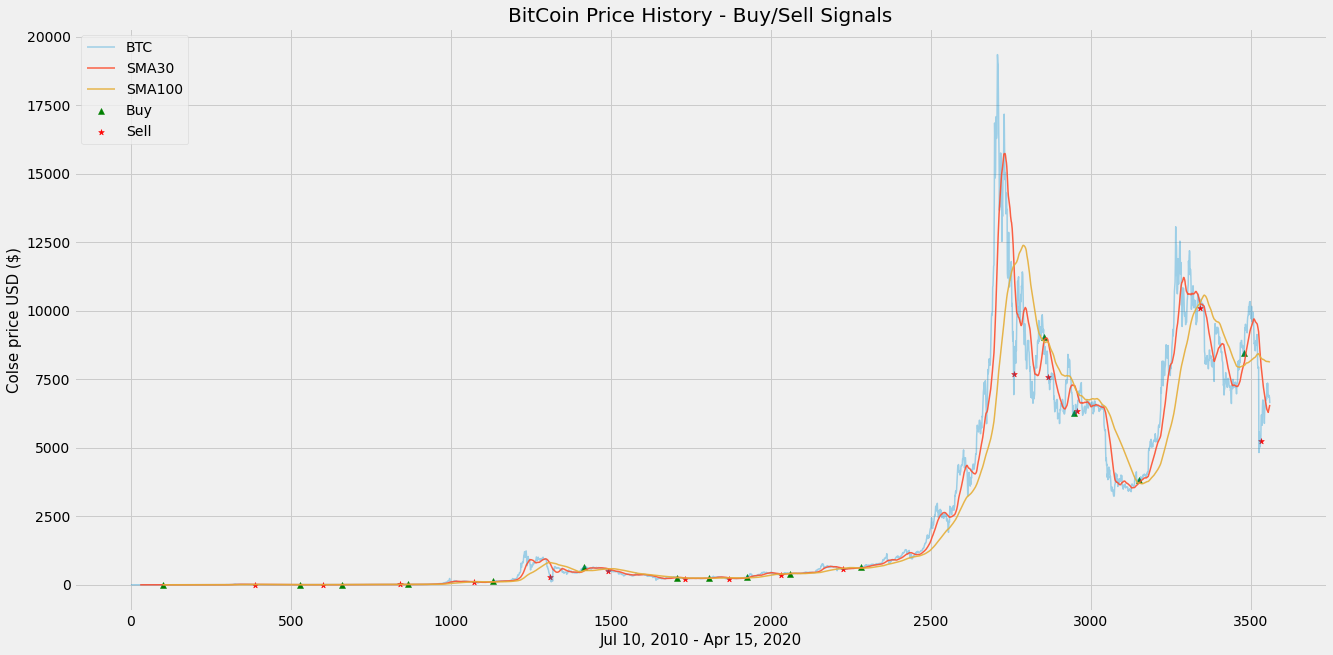

In [20]:
#Vizualise de data appling the Buy and Sell strategy
#Vizualise de data
plt.figure(figsize=(20,10))

plt.plot(data['BTC'], label='BTC', alpha=0.35, linewidth=1.5)
plt.plot(data['SMA30'], label="SMA30", alpha=0.9, linewidth=1.5)
plt.plot(data['SMA100'], label='SMA100', alpha=0.9, linewidth=1.5)

plt.scatter(data.index, data['Buy_signal'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_signal'], label='Sell', marker='*', color='red')

plt.title("BitCoin Price History - Buy/Sell Signals", size=20)
plt.xlabel('Jul 10, 2010 - Apr 15, 2020', size=15)
plt.ylabel('Colse price USD ($)', size=15)
plt.legend(loc='upper left')
plt.show()

##**Conclusion**
***
* We create a cross MA function, that is able to signalize the BUY and SELL moments, based on the function strategy.
 * Buy moment is represented by a GREEN signal in the chart when the SM30 cross SM100 to the top.
 * Sell moment is represented by a RED signal in the chart when the SM30 cross SM100 to the downwards.

* This code can be applied for other stock without the necessity to change the function;
* In this proposal, SMA30 (30 days) and SMA100 (100 days) were used, which can be customized through small changes in the code;

 